Author: Audrey
(beginning date:2022/10/16, end date: 2022/10/18)

## Introduction

Dataset of participant1 will be analysed in this notebook.

##### Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##### Read data

In [21]:
p1 = pd.read_csv("D:/university/s2/3406/2022-DATA3406-RE06-Group04/src/resources/Participant-01-second-detail.csv")

Dataset of participant1 has been saved in varibale p1.

##### Data cleaning

Things I will do here are checking that is there any null values and only keeping columns that I need. 

In [22]:
p1.isnull().sum().sum()

0

There is no null value since the result is 0. Then, I will select rows that I need and saved it to the new varibale.

In [23]:
# only keep columns that we need
data = pd.DataFrame({"Date": p1['Date'], "Count":p1['Count']})
# convert type of date to datatiimes 
data['Date'] = pd.to_datetime(data['Date'])
# group data by date
per_day_data =  data.groupby(['Date']).sum()
per_day_data

,Count
Date,
2022-01-01,22097
2022-01-02,19454
2022-01-03,8805
2022-01-04,20238
2022-01-05,22124
...,...
2022-09-21,7308
2022-09-22,9688
2022-09-23,12237


As we can see from above table, all data has been grouped by date and the 'count' column represents the total number of steps per day. Also, data type of the "Date" column has been changed to datetime. 

For the next step, there are two actions need to be done. The first thing is convert data seriers index to data column, and the second thing is group data by week.

In [24]:
# convert data seriers index to data column
per_day_data.reset_index(inplace=True)
# group per_day data by week.
weekly_data = per_day_data.resample('W', on="Date").sum()
weekly_data

,Count
Date,
2022-01-02,41551
2022-01-09,127289
2022-01-16,137307
2022-01-23,134580
2022-01-30,121104
2022-02-06,96668
2022-02-13,107738
2022-02-20,90998
2022-02-27,77026


Now, the data has been aggreated by week and the data is stored in varibale weekly_data.

In order to do the further action, we need to convert data type of "Date" to datetimes. Also, the month and the date of begining of each week has been extracted and there are two new columns to store these two information.

In [25]:
weekly_data.reset_index(inplace=True)
weekly_data['month'] = pd.DatetimeIndex(weekly_data['Date']).month
weekly_data['date_of_the_beginning_of_the_week'] = pd.DatetimeIndex(weekly_data['Date']).day
weekly_data

,Date,Count,month,date_of_the_beginning_of_the_week
0,2022-01-02,41551,1,2
1,2022-01-09,127289,1,9
2,2022-01-16,137307,1,16
3,2022-01-23,134580,1,23
4,2022-01-30,121104,1,30
5,2022-02-06,96668,2,6
6,2022-02-13,107738,2,13
7,2022-02-20,90998,2,20
8,2022-02-27,77026,2,27
9,2022-03-06,67415,3,6


As above tabled showed, we successfuly convert seriers index to data column and two new conlumns have existed.
After that, weeks that with the max steps count in each month has been selected, which saved in varibale group_data.

In [26]:
group_data = weekly_data.groupby(['month']).max(['Count'])
group_data

,Count,date_of_the_beginning_of_the_week
month,,
1,137307,30
2,107738,27
3,120349,27
4,92950,24
5,117220,29
6,149851,26
7,122183,31
8,130916,28
9,122983,25


After the last aggreation, the final step we need to do is visulise the result.

In [27]:
group_data.reset_index(inplace=True)
group_data

,month,Count,date_of_the_beginning_of_the_week
0,1,137307,30
1,2,107738,27
2,3,120349,27
3,4,92950,24
4,5,117220,29
5,6,149851,26
6,7,122183,31
7,8,130916,28
8,9,122983,25


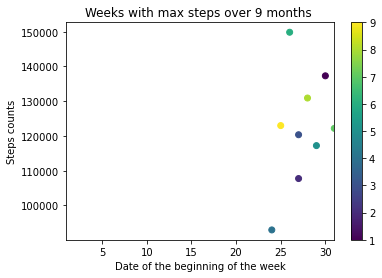

In [74]:
plt.xlim(1,31)
plt.scatter(group_data['date_of_the_beginning_of_the_week'], group_data['Count'], c = group_data['month'], cmap = 'viridis')
plt.xlabel("Date of the beginning of the week")
plt.ylabel("Steps counts")
plt.title("Weeks with max steps over 9 months ")
plt.colorbar()


In [75]:
# group_data.plot.scatter(x="date_of_the_beginning_of_the_week", y="Count", c="month", colormap='viridis', xticks=range(1,31), xlabel='date_of_the_beginning_of_the_week', ylabel= 'step counts', title='Weeks with max steps over 9 months')


##### Conclusion

We can find that partucipant1 also do more exercises at the last or the first week of month, which completely same with the participant5 and participant2.